In [10]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('data/winequality-white.csv', sep=';')

In [3]:
raw_data.shape

(4898, 12)

In [4]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
X = raw_data.iloc[:, :-1]
y = raw_data['quality']

In [8]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [9]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [11]:
y_class = np.where(y<6, 0,1)

In [12]:
y_class

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
pd.DataFrame(y_class).value_counts()

1    3258
0    1640
Name: count, dtype: int64

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.62,-1.97,-2.76,-1.14,-1.68,-1.96,-3.04,-2.31,-3.10,-2.36,-2.04
25%,-0.66,-0.68,-0.53,-0.93,-0.45,-0.72,-0.71,-0.77,-0.65,-0.70,-0.82
50%,-0.06,-0.18,-0.12,-0.23,-0.13,-0.08,-0.10,-0.10,-0.05,-0.17,-0.09
75%,0.53,0.41,0.46,0.69,0.19,0.63,0.67,0.69,0.61,0.53,0.72
max,8.71,8.15,10.96,11.71,13.74,14.92,7.10,15.03,4.18,5.17,3.00


In [16]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y_class, test_size=0.3, random_state=0)

In [17]:
from sklearn import svm
classifier = svm.SVC(C=1, kernel='rbf', gamma=0.01)

In [18]:
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [19]:
y_pred = classifier.decision_function(X_test)
y_pred

array([-0.15870061, -0.17117575,  1.0288138 , ...,  1.55980066,
        1.15861042,  0.66616254])

In [21]:
from sklearn import metrics

fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)

In [22]:
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.8135407003768907

Text(0, 0.5, 'Taux de vrais positifs')

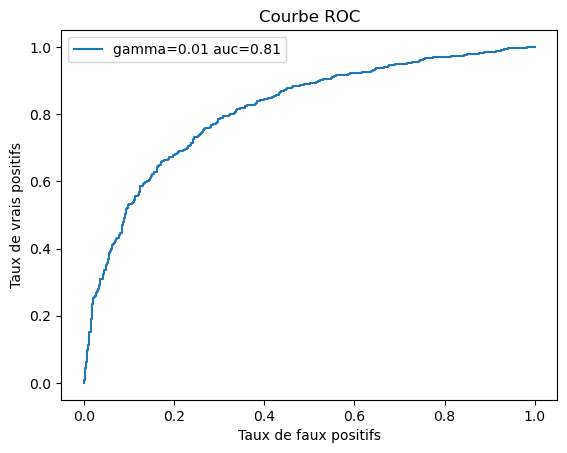

In [34]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(fpr, tpr, label=f'gamma=0.01 auc={auc:0.2f}')
ax.legend()
ax.set_title('Courbe ROC')
ax.set_xlabel('Taux de faux positifs')
ax.set_ylabel('Taux de vrais positifs')